Problem Defination:The prediction task is to determine whether a person makes over $50K a year.

First Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

load data set

In [2]:
ds=pd.read_csv("census1.csv")

In [3]:
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
ds.shape

(32560, 15)

data set have 32560 rows and 15columns

# Checking Data types

In [6]:
ds.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

data set have some input features of int and object data type and target variable is object type

# Checking Missing Values

In [7]:
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

data set have no missing values

<AxesSubplot:>

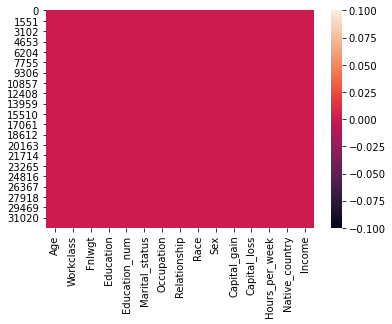

In [8]:
sns.heatmap(ds.isnull())

above heatmap shows that there is no missing value

# Stastical Summary

In [9]:
ds.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Checking Correlation

In [10]:
ds.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

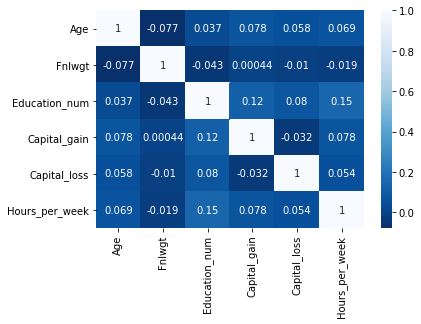

In [11]:
sns.heatmap(ds.corr(),annot=True,cmap='Blues_r')

above heatmapshows the correlaton between different variables,

In [12]:
df=pd.DataFrame(ds)

importing data set into pandas dataframe

In [13]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Visualazation of categorical data

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


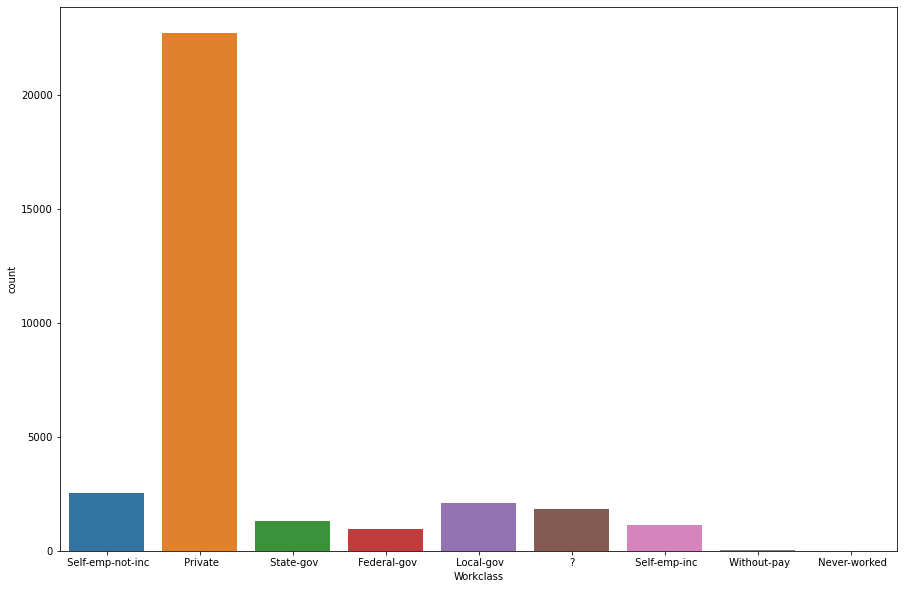

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(df['Workclass'])
print(df['Workclass'].value_counts())

above countplot of workclass shows the categories of workclass and values of that categories

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


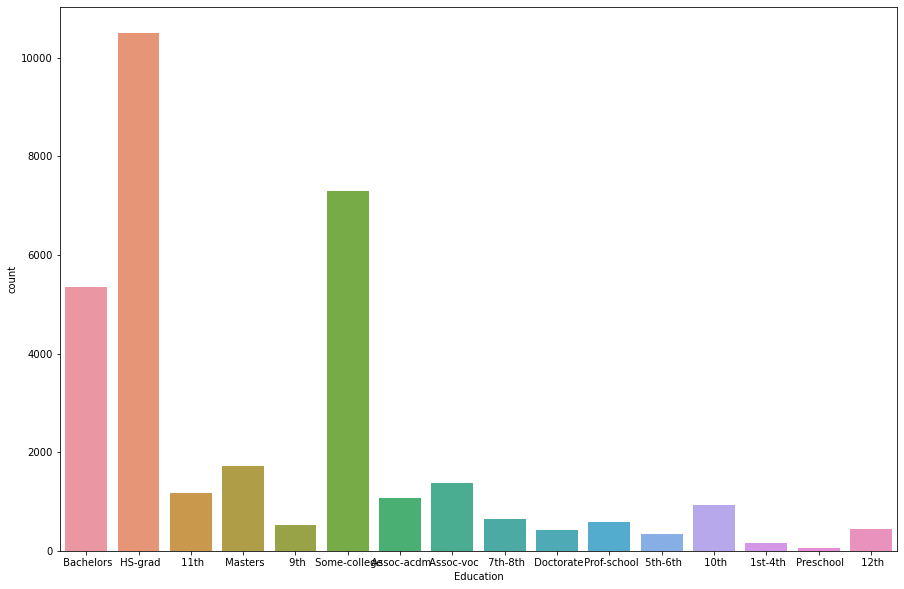

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(df['Education'])
print(df['Education'].value_counts())

above countplot of education shows different types of education  

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


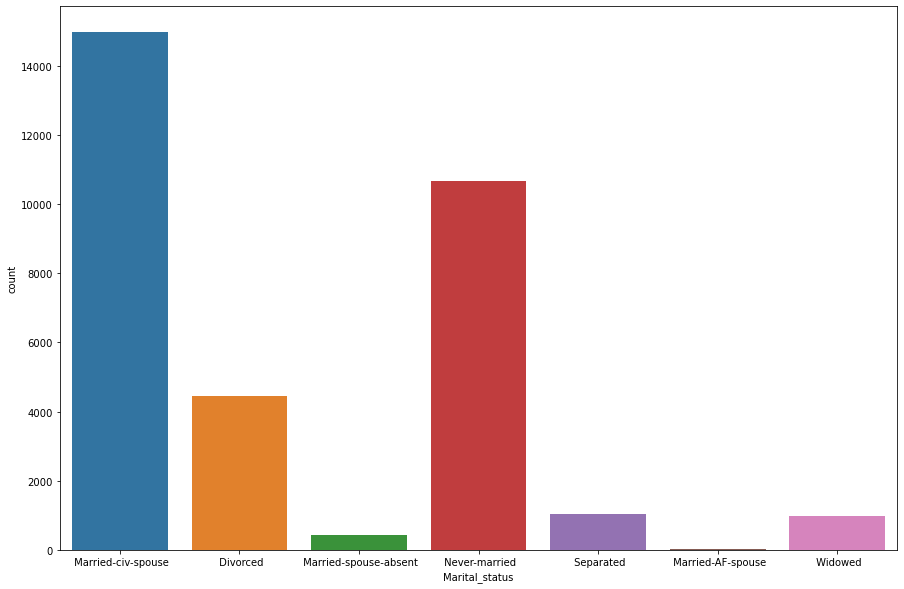

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(df['Marital_status'])
print(df['Marital_status'].value_counts())

above countplot shows marital status and it's counting 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


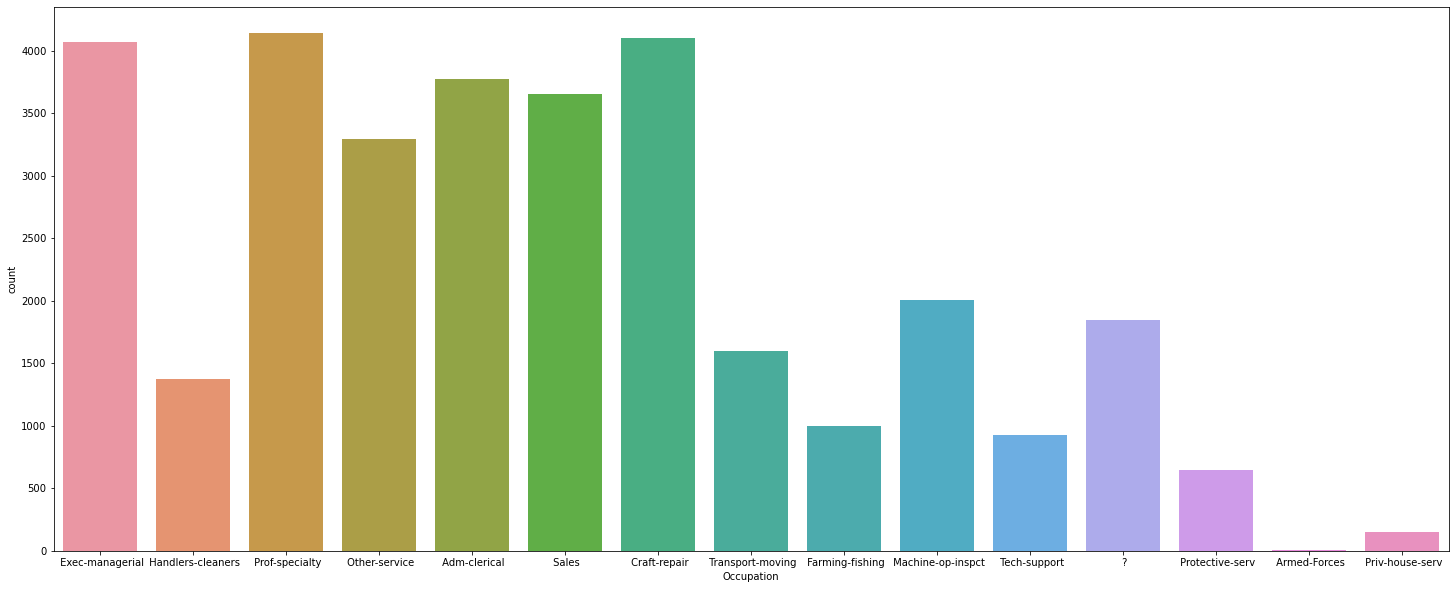

In [17]:
plt.figure(figsize=(25,10))
sns.countplot(df['Occupation'])
print(df['Occupation'].value_counts())

above countplot shows categories of accupation

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


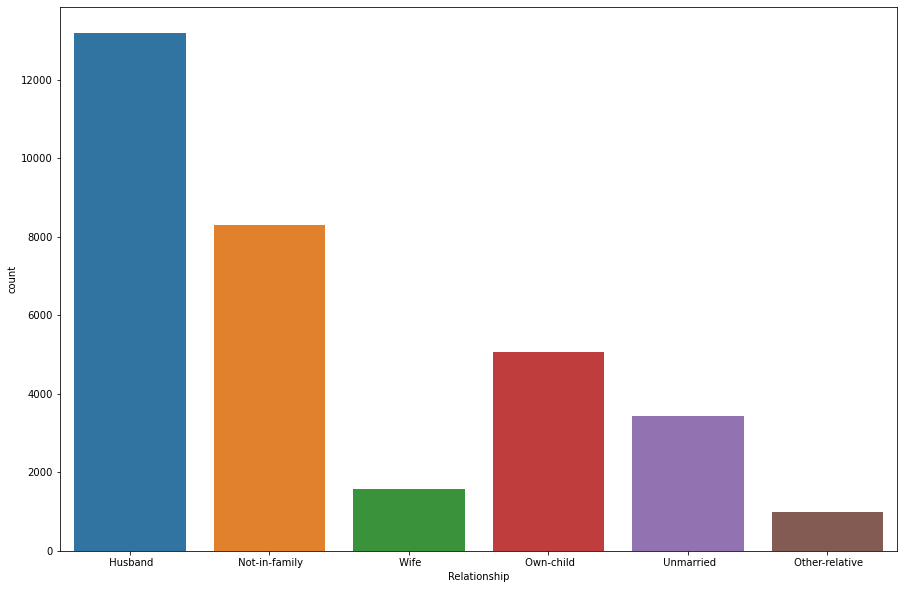

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(df['Relationship'])
print(df['Relationship'].value_counts())

above countplot shows relatioships

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


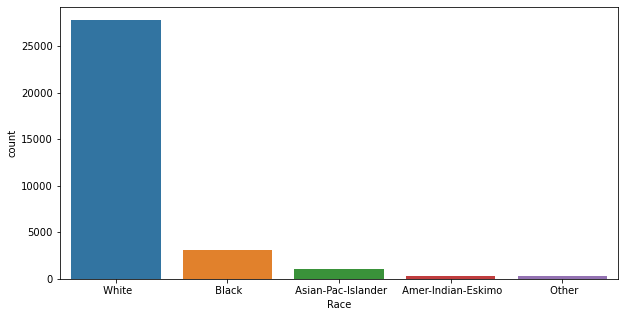

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df['Race'])
print(df['Race'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


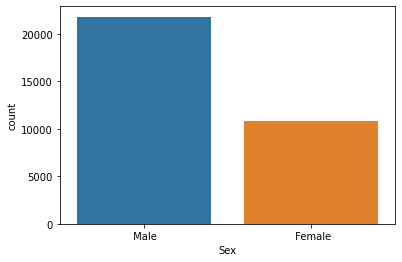

In [20]:
sns.countplot(df['Sex'])
print(df['Sex'].value_counts())

above countplot shows that there are more male candidates than female candidates

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

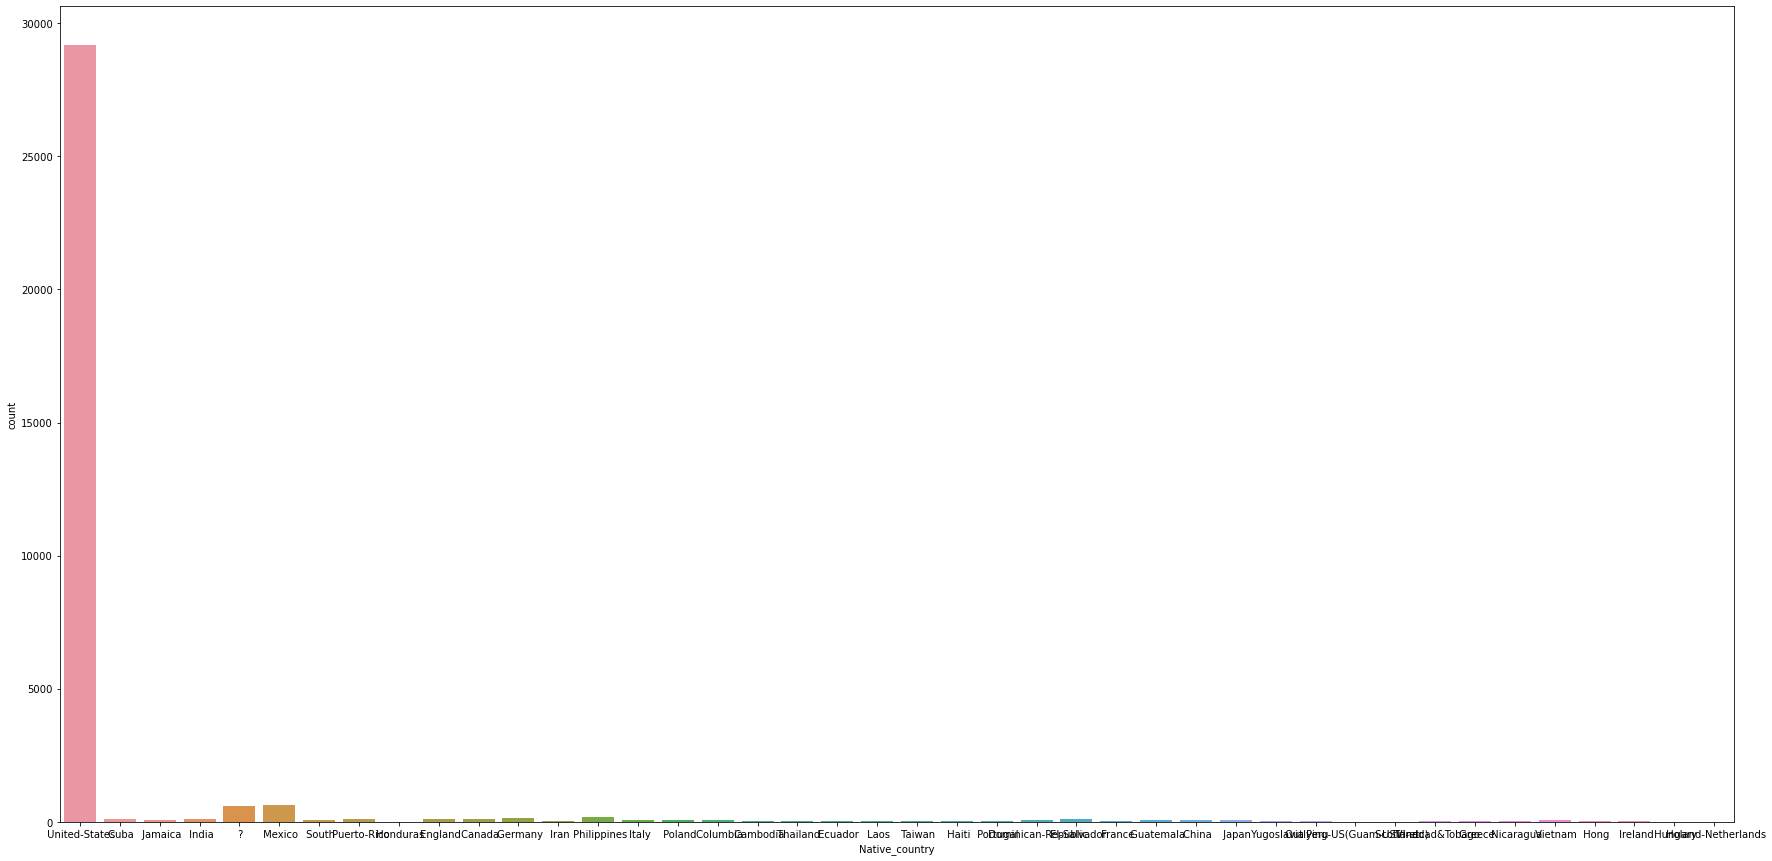

In [21]:
plt.figure(figsize=(30,15))
sns.countplot(df['Native_country'])
print(df['Native_country'].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


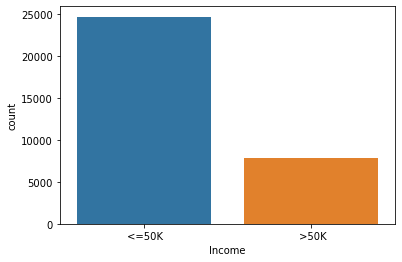

In [22]:
sns.countplot(df['Income'])
print(df['Income'].value_counts())

above countplot shows that data set have  class imbalance problem

In [23]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


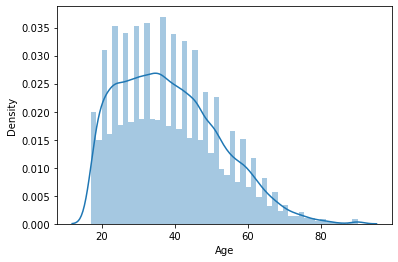

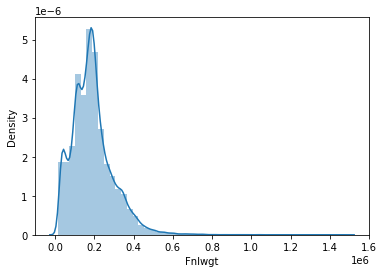

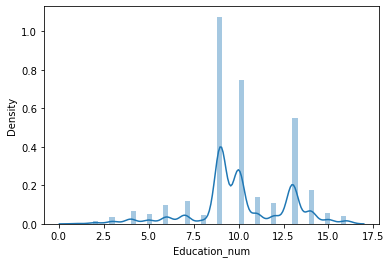

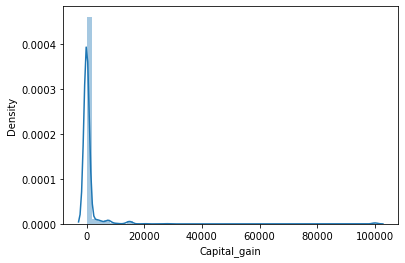

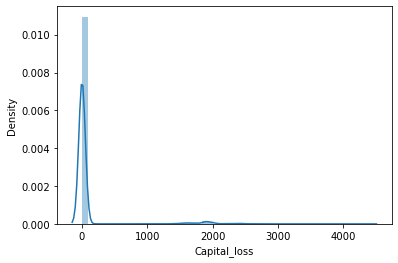

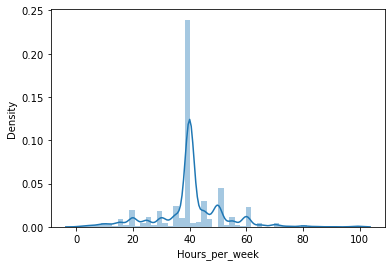

<Figure size 432x288 with 0 Axes>

In [24]:
cols=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
for i in df[cols]:
    sns.distplot(df[i])
    plt.figure()

above distribution plots hsows that some data columns such as Fnlwgt' ,'Capital_gain','Capital_loss have skewness,we have to dealwith it

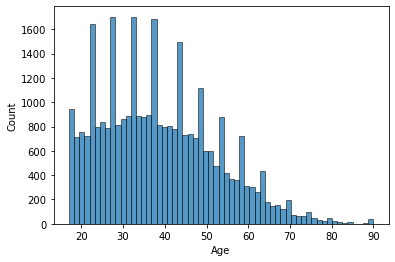

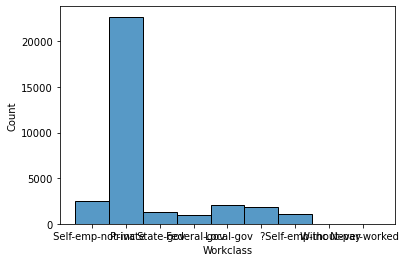

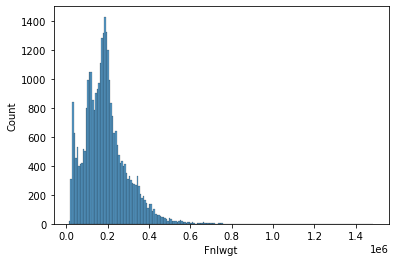

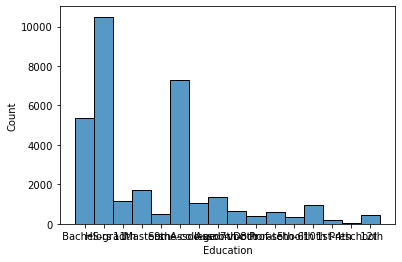

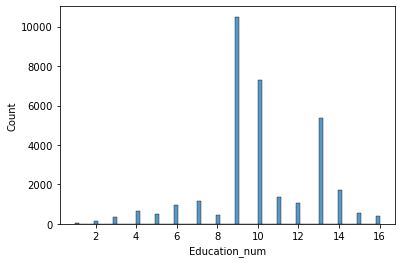

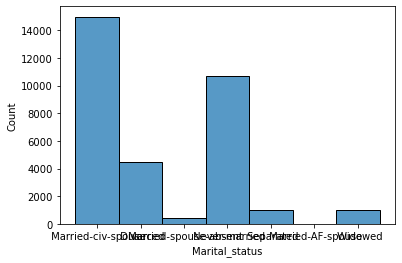

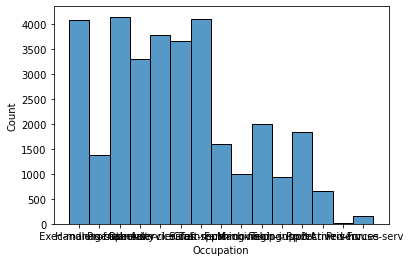

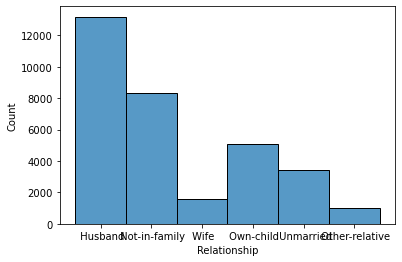

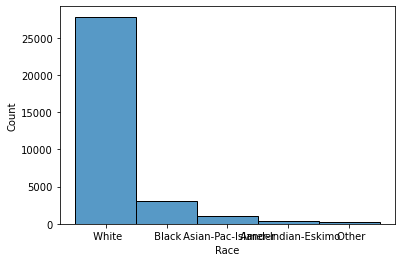

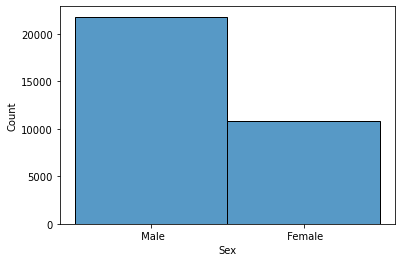

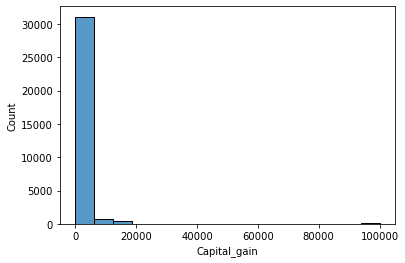

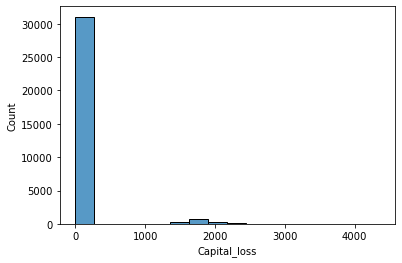

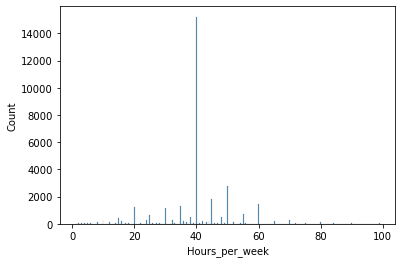

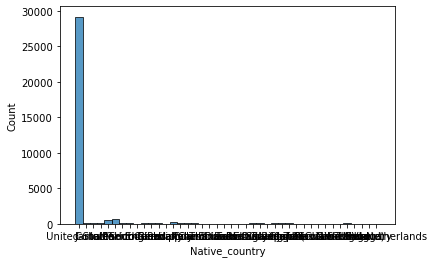

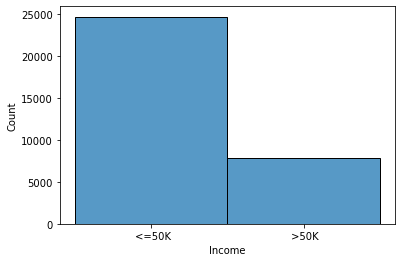

<Figure size 432x288 with 0 Axes>

In [25]:
for i in df.columns:
    sns.histplot(df[i])
    plt.figure()

histplots shows the frequecis of data in data frame

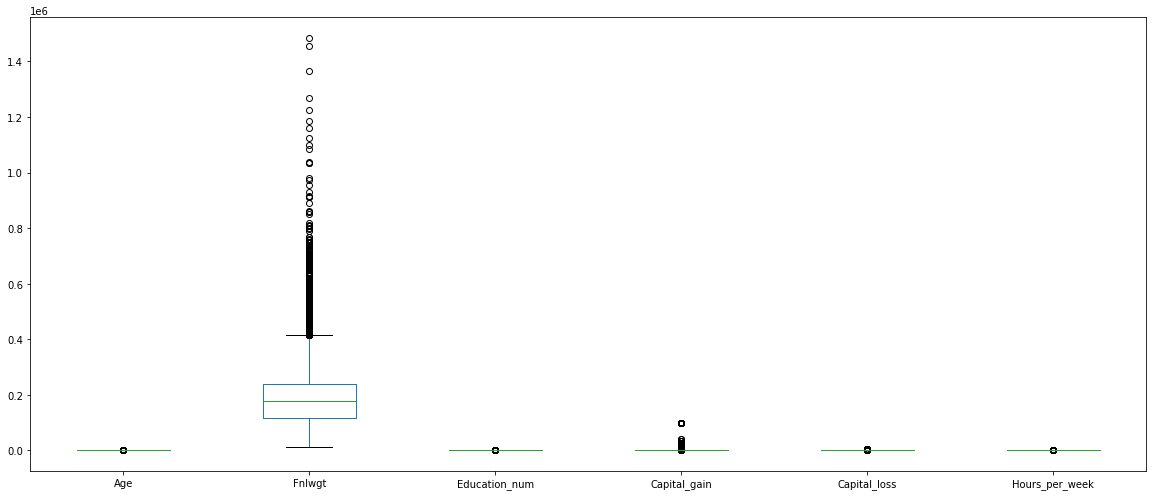

In [26]:
df.plot(kind='box',figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

above boxplot shows that there are some outliers present

In [27]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

Fnlwgt' ,'Capital_gain','Capital_loss', column have skewness

In [28]:
df2=df.iloc[:]

In [29]:
df2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [30]:
df2.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

reducing skewnessusing log function

In [31]:
cols=['Fnlwgt' ,'Capital_gain','Capital_loss']
for i in df2[cols]:
    df2[i]=np.log(1+df2[i])


In [32]:
df2.skew()

Age               0.558738
Fnlwgt           -0.842559
Education_num    -0.311630
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
dtype: float64

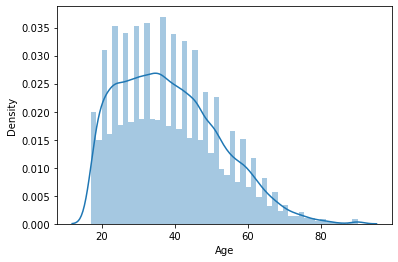

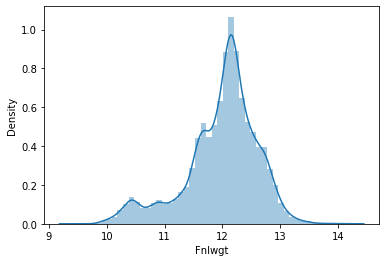

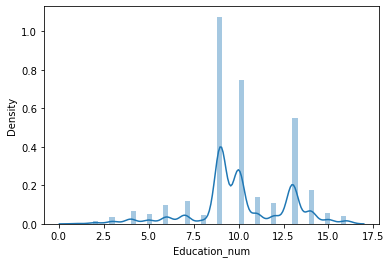

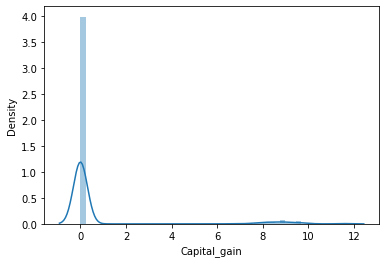

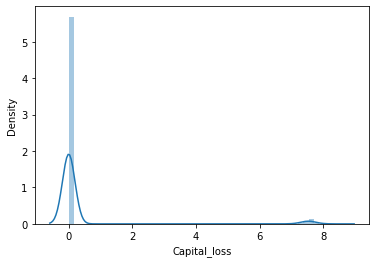

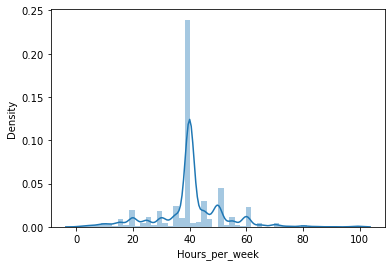

<Figure size 432x288 with 0 Axes>

In [33]:
cols=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
for i in df2[cols]:
    sns.distplot(df2[i])
    plt.figure()

# Encoding categorical data into numerical data

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
df2['Workclass']=le.fit_transform(df['Workclass'])

In [37]:
df2['Education']=le.fit_transform(df['Education'])

In [38]:
df2['Marital_status']=le.fit_transform(df['Marital_status'])

In [39]:
df2['Occupation']=le.fit_transform(df2['Occupation'])

In [40]:
df2['Relationship']=le.fit_transform(df2['Relationship'])

In [41]:
df2['Race']=le.fit_transform(df2['Race'])

In [42]:
df2['Sex']=le.fit_transform(df2['Sex'])

In [43]:
df2['Native_country']=le.fit_transform(df2['Native_country'])

In [44]:
df2['Income']=le.fit_transform(df2['Income'])

In [45]:
df2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,11.330348,9,13,2,4,0,4,1,0.0,0.0,13,39,0
1,38,4,12.281398,11,9,0,6,1,4,1,0.0,0.0,40,39,0
2,53,4,12.366157,1,7,2,6,0,2,1,0.0,0.0,40,39,0
3,28,4,12.732013,9,13,2,10,5,2,0,0.0,0.0,40,5,0
4,37,4,12.558780,12,14,2,4,5,4,0,0.0,0.0,40,39,0


encoded all categorical data into numerical data

In [46]:
df2.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

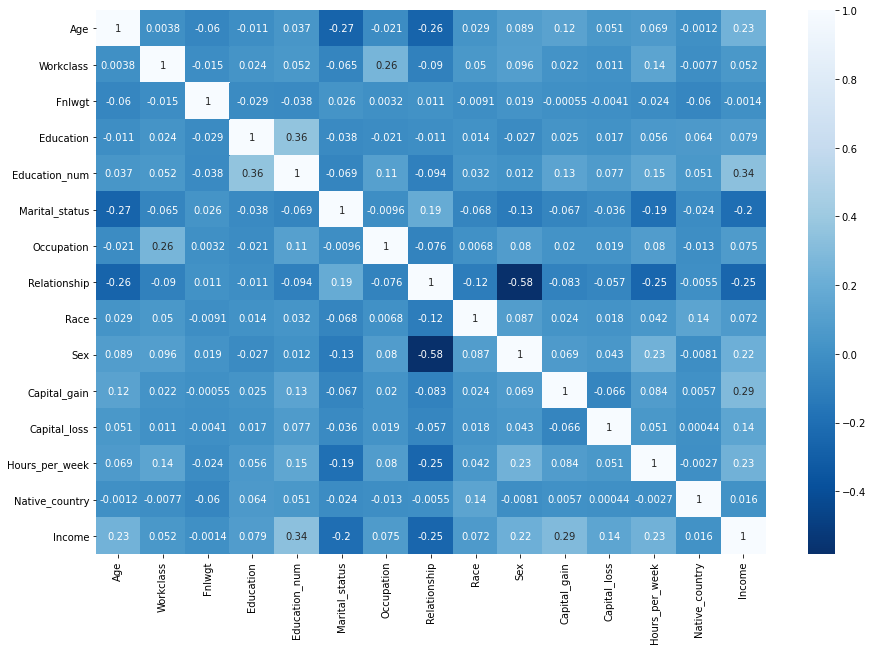

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True,cmap='Blues_r')

above heatmapshows the correlationship between target variable and input variables

In [48]:
df2['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

spliting data into input features and target variable

In [49]:
x=df2.drop('Income',axis=1)

In [50]:
y=df2['Income']

importing classification algorithmns librarirs

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

handling class imblanacing problem by over_samplig

In [52]:
sm=SMOTE()

In [53]:
x1,y1=sm.fit_resample(x,y)

spliting data fot training and testing

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=47)

In [55]:
print("x_train shape=",x_train.shape)
print("x_test shape=",x_test.shape)
print("y_train shape=",y_train.shape)
print("y_test shape=",x_test.shape)

x_train shape= (34606, 14)
x_test shape= (14832, 14)
y_train shape= (34606,)
y_test shape= (14832, 14)


In [56]:
lg=LogisticRegression()
dc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()

In [57]:
list1=[lg,dc,knn,sv,rf,ad]
for i in list1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("accuracy_scores=",i)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

accuracy_scores= LogisticRegression()
0.7620685005393744
[[5546 1870]
 [1659 5757]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      7416
           1       0.75      0.78      0.77      7416

    accuracy                           0.76     14832
   macro avg       0.76      0.76      0.76     14832
weighted avg       0.76      0.76      0.76     14832

accuracy_scores= DecisionTreeClassifier()
0.8421655879180151
[[6195 1221]
 [1120 6296]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7416
           1       0.84      0.85      0.84      7416

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832

accuracy_scores= KNeighborsClassifier()
0.8252427184466019
[[5384 2032]
 [ 560 6856]]
              precision    recall  f1-score   support

           0       0.91      0.73

by observing different classification algoritmns's accuracy metrics, Random Forest Classifier gives more accuracy

Checking Area Under Curves of above algorithms

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

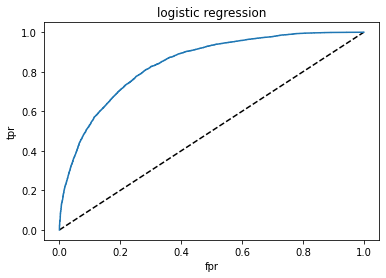

In [59]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("logistic regression")
plt.show()

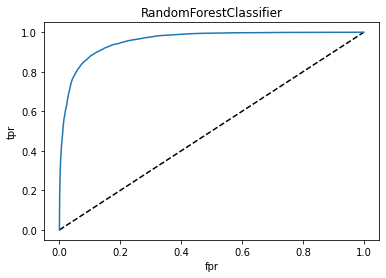

In [60]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()


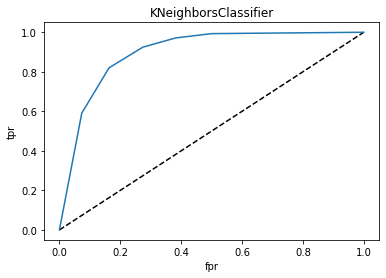

In [61]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("KNeighborsClassifier")
plt.show()

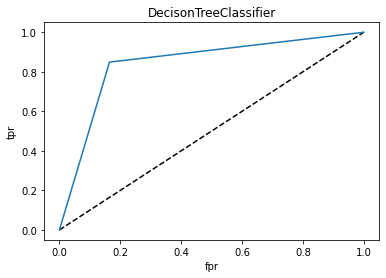

In [62]:
y_pred_prob=dc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisonTreeClassifier')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("DecisonTreeClassifier")
plt.show()


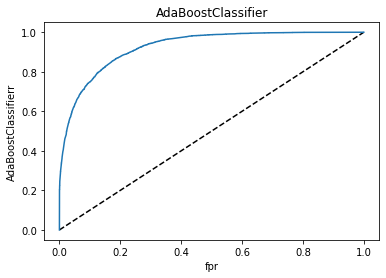

In [63]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel("fpr")
plt.ylabel("AdaBoostClassifierr")
plt.title("AdaBoostClassifier")
plt.show()


above roc_curves show that random forest classifier have more area under curve than others

# Checking cross_val_scores

In [64]:
for i in list1:
    scores=cross_val_score(i,x1,y1,cv=5)
    print("cross_scores",i)
    print(scores.mean())

cross_scores LogisticRegression()
0.7600027233302662
cross_scores DecisionTreeClassifier()
0.8472235349252377
cross_scores KNeighborsClassifier()
0.8365228006898666
cross_scores SVC()
0.7802299642922959
cross_scores RandomForestClassifier()
0.8935038160174372
cross_scores AdaBoostClassifier()
0.8378781853062585


by observing accuracy_score anf above cross_val_score, randomforestclassifier is best model comparing to others

# HyperParameterTunning

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
 param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5)

grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [67]:
grid.best_score_

0.8831126085072624

In [68]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 30}

In [69]:
rf1=RandomForestClassifier(bootstrap=False,max_features= 'sqrt',min_samples_split=4,n_estimators=30)
rf1.fit(x_train,y_train)
rpred=rf1.predict(x_test)
cv3=cross_val_score(rf1,x1,y1,cv=5)
print("score",cv3)
print("accuracy_scores=",rf1)
print(accuracy_score(y_test,rpred))
print(confusion_matrix(y_test,rpred))
print(classification_report(y_test,rpred))

score [0.84981796 0.87520227 0.91191343 0.91564681 0.91251138]
accuracy_scores= RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_split=4, n_estimators=30)
0.8890911542610572
[[6497  919]
 [ 726 6690]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7416
           1       0.88      0.90      0.89      7416

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



creating object file

In [70]:
import joblib

In [71]:
joblib.dump(rf1,'Census1.obj')

['Census1.obj']

In [72]:
f1=joblib.load('Census1.obj')